# Dataset Brief
Dataset yang digunakan berisi transaksi dari tahun 2009 sampai dengan tahun 2012 dengan jumlah raw data sebanyak 5500, termasuk di dalamnya order status yang terbagi menjadi order finished, order returned dan order cancelled

Adapun dataset yang sudah diberikan dan akan digunakan pada project ini berisi data sebagai berikut.

1. OrderID
2. Order Status
3. Customer
4. Order Date
5. Order Quantity
6. Sales
7. Discount %
8. Discount
9. Product Category
10. Product Sub-Category

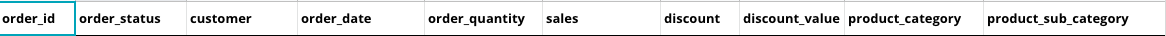

Nama tabel adalah yang akan digunakan pada project ini adalah dqlab_sales_store

# Petunjuk Penyelesaian Project
Untuk menyelesaikan project, maka kita akan mengetikkan code yang perlu disubmit untuk dicek jawabannya benar atau salah.

Dari data yang sudah diberikan, dari pihak manajemen DQLab store ingin mengetahui:

 - 1A. Overall perofrmance DQLab Store dari tahun 2009 - 2012 untuk jumlah order dan total sales order finished

 - 1B. Overall performance DQLab by subcategory product yang akan dibandingkan antara tahun 2011 dan tahun 2012

 

 - 2A. Efektifitas dan efisiensi promosi yang dilakukan selama ini, dengan menghitung burn rate dari promosi yang dilakukan overall berdasarkan tahun

 - 2B. Efektifitas dan efisiensi promosi yang dilakukan selama ini, dengan menghitung burn rate dari promosi yang dilakukan overall berdasarkan sub-category

 

Setelah melihat hasil analisa di Sub Bab 1 dan 2, selanjutnya dilakukan analisa terhadap customer DQLab. Analisa dari sisi customer dengan menggunakan metrics:

 - 3A. Analisa terhadap customer setiap tahunnya

 - 3B. Analisa terhadap jumlah customer baru setiap tahunnya

 - 3C. Cohort untuk mengetahui angka retention customer tahun 2009



 # Overall Performance by Year
Buatlah Query dengan menggunakan SQL untuk mendapatkan total penjualan (sales) dan jumlah order (number_of_order) dari tahun 2009 sampai 2012 (years). 

Output yang harus dihasilkan adalah sebagai berikut.



SQL Code
```
SELECT
    YEAR(order_date) AS years,
    ROUND(SUM(sales), 2) AS sales,
    COUNT(order_quantity) AS number_of_order
FROM
    dqlab_sales_store
WHERE
    YEAR(order_date) BETWEEN 2009
    AND 2012
    AND order_status LIKE 'Order Finished'
GROUP BY
    years
ORDER BY
    years;
```

Output:
```
+-------+------------+-----------------+
| years | sales      | number_of_order |
+-------+------------+-----------------+
|  2009 | 4613872681 |            1244 |
|  2010 | 4059100607 |            1248 |
|  2011 | 4112036186 |            1178 |
|  2012 | 4482983158 |            1254 |
+-------+------------+-----------------+
```

# Overall Performance by Product Sub Category
Buatlah Query dengan menggunakan SQL untuk mendapatkan total penjualan (sales) berdasarkan sub category dari produk (product_sub_category) pada tahun 2011 dan 2012 saja (years) 

Output yang harus dihasilkan adalah sebagai berikut.

SQL Code
```
SELECT
    YEAR(order_date) AS years,
    product_sub_category,
    SUM(sales) AS sales
FROM
    dqlab_sales_store
WHERE
    YEAR(order_date) BETWEEN 2011
    AND 2012
    AND order_status LIKE 'Order Finished'
GROUP BY
    years,
    product_sub_category
ORDER BY
    years,
    sales DESC;
```


Output:
```
+-------+--------------------------------+-----------+
| years | product_sub_category           | sales     |
+-------+--------------------------------+-----------+
|  2011 | Chairs & Chairmats             | 622962720 |
|  2011 | Office Machines                | 545856280 |
|  2011 | Tables                         | 505875008 |
|  2011 | Copiers and Fax                | 404074080 |
|  2011 | Telephones and Communication   | 392194658 |
|  2011 | Binders and Binder Accessories | 298023200 |
|  2011 | Storage & Organization         | 285991820 |
|  2011 | Appliances                     | 272630020 |
|  2011 | Computer Peripherals           | 232677960 |
|  2011 | Bookcases                      | 169304620 |
|  2011 | Office Furnishings             | 160471500 |
|  2011 | Paper                          | 111080380 |
|  2011 | Pens & Art Supplies            |  43093800 |
|  2011 | Envelopes                      |  36463900 |
|  2011 | Labels                         |  15607780 |
|  2011 | Scissors, Rulers and Trimmers  |  12638340 |
|  2011 | Rubber Bands                   |   3090120 |
|  2012 | Office Machines                | 811427140 |
|  2012 | Chairs & Chairmats             | 654168740 |
|  2012 | Telephones and Communication   | 422287514 |
|  2012 | Tables                         | 388993784 |
|  2012 | Binders and Binder Accessories | 363879200 |
|  2012 | Storage & Organization         | 356714140 |
|  2012 | Computer Peripherals           | 308014340 |
|  2012 | Copiers and Fax                | 292489800 |
|  2012 | Appliances                     | 266131100 |
|  2012 | Office Furnishings             | 178927480 |
|  2012 | Bookcases                      | 159984680 |
|  2012 | Paper                          | 126896160 |
|  2012 | Envelopes                      |  58629280 |
|  2012 | Pens & Art Supplies            |  43818480 |
|  2012 | Scissors, Rulers and Trimmers  |  36776400 |
|  2012 | Labels                         |  10007040 |
|  2012 | Rubber Bands                   |   3837880 |
+-------+--------------------------------+-----------+

```

# Promotion Effectiveness and Efficiency by Years
Pada bagian ini kita akan melakukan analisa terhadap efektifitas dan efisiensi dari promosi yang sudah dilakukan selama ini

Efektifitas dan efisiensi dari promosi yang dilakukan akan dianalisa berdasarkan Burn Rate yaitu dengan membandigkan total value promosi yang dikeluarkan terhadap total sales yang diperoleh

DQLab berharap bahwa burn rate tetap berada diangka maskimum 4.5%

Formula untuk burn rate : (total discount / total sales) * 100

Buatkan Derived Tables untuk menghitung total sales (sales) dan total discount (promotion_value) berdasarkan tahun(years) dan formulasikan persentase burn rate nya (burn_rate_percentage).

Adapun output yang seharusnya dihasilkan adalah sebagai berikut.

SQL code:
```
SELECT
    YEAR(order_date) AS years,
    SUM(sales) AS sales,
    SUM(discount_value) AS promotion_value,
    ROUND(SUM(discount_value) / SUM(sales) * 100, 2) as burn_rate_percentage
FROM
    dqlab_sales_store
WHERE
    YEAR(order_date) BETWEEN 2009
    AND 2012
    AND order_status LIKE 'Order Finished'
GROUP BY
    years
ORDER BY
    years;
```
Output:

```
+-------+------------+-----------------+----------------------+
| years | sales      | promotion_value | burn_rate_percentage |
+-------+------------+-----------------+----------------------+
|  2009 | 4613872681 |       214330327 |                 4.65 |
|  2010 | 4059100607 |       197506939 |                 4.87 |
|  2011 | 4112036186 |       214611556 |                 5.22 |
|  2012 | 4482983158 |       225867642 |                 5.04 |
+-------+------------+-----------------+----------------------+
```

Promotion Effectiveness and Efficiency by Product Sub Category
Pada bagian ini kita akan melakukan analisa terhadap efektifitas dan efisiensi dari promosi yang sudah dilakukan selama ini seperti pada bagian sebelumnya. 

Akan tetapi, ada kolom yang harus ditambahkan, yaitu : product_sub_category dan product_category

SQL Code:
```
SELECT
    YEAR(order_date) AS years,
    product_sub_category,
    product_category,
    SUM(sales) AS sales,
    SUM(discount_value) AS promotion_value,
    ROUND(SUM(discount_value) / SUM(sales) * 100, 2) as burn_rate_percentage
FROM
    dqlab_sales_store
WHERE
    YEAR(order_date) = 2012
    AND order_status LIKE 'Order Finished'
GROUP BY
    years,
    product_sub_category,
    product_category
ORDER BY
    sales DESC;
```

Output:
```
+-------+--------------------------------+------------------+-----------+-----------------+----------------------+
| years | product_sub_category           | product_category | sales     | promotion_value | burn_rate_percentage |
+-------+--------------------------------+------------------+-----------+-----------------+----------------------+
|  2012 | Office Machines                | Technology       | 811427140 |        46616695 |                 5.75 |
|  2012 | Chairs & Chairmats             | Furniture        | 654168740 |        26623882 |                 4.07 |
|  2012 | Telephones and Communication   | Technology       | 422287514 |        18800188 |                 4.45 |
|  2012 | Tables                         | Furniture        | 388993784 |        16348689 |                 4.20 |
|  2012 | Binders and Binder Accessories | Office Supplies  | 363879200 |        22338980 |                 6.14 |
|  2012 | Storage & Organization         | Office Supplies  | 356714140 |        18802166 |                 5.27 |
|  2012 | Computer Peripherals           | Technology       | 308014340 |        15333293 |                 4.98 |
|  2012 | Copiers and Fax                | Technology       | 292489800 |        14530870 |                 4.97 |
|  2012 | Appliances                     | Office Supplies  | 266131100 |        14393300 |                 5.41 |
|  2012 | Office Furnishings             | Furniture        | 178927480 |         8233849 |                 4.60 |
|  2012 | Bookcases                      | Furniture        | 159984680 |        10024365 |                 6.27 |
|  2012 | Paper                          | Office Supplies  | 126896160 |         6224694 |                 4.91 |
|  2012 | Envelopes                      | Office Supplies  |  58629280 |         2334321 |                 3.98 |
|  2012 | Pens & Art Supplies            | Office Supplies  |  43818480 |         2343501 |                 5.35 |
|  2012 | Scissors, Rulers and Trimmers  | Office Supplies  |  36776400 |         2349280 |                 6.39 |
|  2012 | Labels                         | Office Supplies  |  10007040 |          452245 |                 4.52 |
|  2012 | Rubber Bands                   | Office Supplies  |   3837880 |          117324 |                 3.06 |
+-------+--------------------------------+------------------+-----------+-----------------+----------------------+ 
```

# Customers Transactions per Year
DQLab Store ingin mengetahui jumlah customer (number_of_customer) yang bertransaksi setiap tahun dari 2009 sampai 2012 (years).

SQL Code:
```
SELECT
    YEAR(order_date) AS years,
    COUNT(DISTINCT customer) AS number_of_customer
FROM
    dqlab_sales_store
WHERE
    YEAR(order_date) BETWEEN 2009
    AND 2012
    AND order_status LIKE 'Order Finished'
GROUP BY
    years;
```

Output:
```
+-------+--------------------+
| years | number_of_customer |
+-------+--------------------+
|  2009 |                585 |
|  2010 |                593 |
|  2011 |                581 |
|  2012 |                594 |
+-------+--------------------+
```